In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp 

In [2]:
male_df = pd.read_csv('./fifa_2022/players_22.csv')

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
male_df.dtypes

sofifa_id            int64
player_url          object
short_name          object
long_name           object
player_positions    object
                     ...  
player_face_url     object
club_logo_url       object
club_flag_url       object
nation_logo_url     object
nation_flag_url     object
Length: 110, dtype: object

In [4]:
male_df.shape

(19239, 110)

In [5]:
male_df.head(2)

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   

       short_name                       long_name player_positions  overall  \
0        L. Messi  Lionel Andrés Messi Cuccittini       RW, ST, CF       93   
1  R. Lewandowski              Robert Lewandowski               ST       92   

   potential    value_eur  wage_eur  age  ...   lcb    cb   rcb    rb    gk  \
0         93   78000000.0  320000.0   34  ...  50+3  50+3  50+3  61+3  19+3   
1         92  119500000.0  270000.0   32  ...  60+3  60+3  60+3  61+3  19+3   

                                     player_face_url  \
0  https://cdn.sofifa.net/players/158/023/22_120.png   
1  https://cdn.sofifa.net/players/188/545/22_120.png   

                            club_logo_url  \
0  https://cdn.sofifa.net/teams/73/60.png   
1  https://cdn.sofifa.net/teams/21/60.png   

                         club_flag_url  \
0  https://cdn.sofifa.net/flags/fr.png   
1  https://cdn.sofifa.net/flags/de.png   

                            nation_logo_url  \
0  https://cdn.sofifa.net/teams/1369/60.png   
1  https://cdn.sofifa.net/teams/1353/60.png   

                       nation_flag_url  
0  https://cdn.sofifa.net/flags/ar.png  
1  https://cdn.sofifa.net/flags/pl.png  

[2 rows x 110 columns]

### eliminamos columnas inutiles

#### 1 - eliminar columnas con url

In [6]:
male_df.drop(['player_face_url','player_url','club_logo_url','club_flag_url','nation_logo_url','nation_flag_url'],axis=1,inplace=True)

In [7]:
for i in male_df.columns:
    if i.__contains__('url'):
        print(i)

In [8]:
for i in male_df.columns:
    print(i)

sofifa_id
short_name
long_name
player_positions
overall
potential
value_eur
wage_eur
age
dob
height_cm
weight_kg
club_team_id
club_name
league_name
league_level
club_position
club_jersey_number
club_loaned_from
club_joined
club_contract_valid_until
nationality_id
nationality_name
nation_team_id
nation_position
nation_jersey_number
preferred_foot
weak_foot
skill_moves
international_reputation
work_rate
body_type
real_face
release_clause_eur
player_tags
player_traits
pace
shooting
passing
dribbling
defending
physic
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_c

### usamos columna sofifa_id como indice del dataframe

In [9]:
male_df.set_index('sofifa_id',drop=True,inplace=True)

#### Resumen de abreviaciones de posiciones

GK - Goalkeeper

RB - Right Back

RWB - Right Wing Back

CB - Centre Back

LWB - Left Wing Back

LB - Left Back

CM - Centre Mid

CDM - Centre Defensive Mid

CAM - Centre Attacking Mid

RM - Right Mid

LM - Left Mid

LW - Left Wing

RW - Right Wing

CF - Centre Forward

LF - Left Forward

RF - Right Forward

ST - Striker



In [10]:
male_df[[
    'short_name','ls',
'st',
'rs',
'lw',
'lf',
'cf',
'rf',
'rw',
'lam',
'cam',
'ram',
'lm',
'lcm',
'cm',
'rcm',
'rm',
'lwb',
'ldm',
'cdm',
'rdm',
'rwb',
'lb',
'lcb',
'cb',
'rcb',
'rb',
'gk']]

short_name    ls    st    rs  lw  lf  cf  rf  rw   lam  \
sofifa_id                                                                   
158023               L. Messi  89+3  89+3  89+3  92  93  93  93  92    93   
188545         R. Lewandowski  90+2  90+2  90+2  85  88  88  88  85  86+3   
20801       Cristiano Ronaldo  90+1  90+1  90+1  88  89  89  89  88  86+3   
190871              Neymar Jr  83+3  83+3  83+3  90  88  88  88  90  89+2   
192985           K. De Bruyne  83+3  83+3  83+3  88  87  87  87  88  89+2   
...                       ...   ...   ...   ...  ..  ..  ..  ..  ..   ...   
261962              Song Defu  44+2  44+2  44+2  46  45  45  45  46  46+2   
262040              C. Porter  45+2  45+2  45+2  47  46  46  46  47  47+2   
262760               N. Logue  45+2  45+2  45+2  46  46  46  46  46  47+2   
262820              L. Rudden  47+2  47+2  47+2  47  47  47  47  47  45+2   
264540     E. Lalchhanchhuaha  45+2  45+2  45+2  47  47  47  47  47  47+2   

           ...   ldm   cdm   rdm   rwb    lb   lcb    cb   rcb    rb    gk  
sofifa_id  ...                                                              
158023     ...  64+3  64+3  64+3  66+3  61+3  50+3  50+3  50+3  61+3  19+3  
188545     ...  66+3  66+3  66+3  64+3  61+3  60+3  60+3  60+3  61+3  19+3  
20801      ...  59+3  59+3  59+3  63+3  60+3  53+3  53+3  53+3  60+3  20+3  
190871     ...  63+3  63+3  63+3  67+3  62+3  50+3  50+3  50+3  62+3  20+3  
192985     ...  80+3  80+3  80+3  79+3  75+3  69+3  69+3  69+3  75+3  21+3  
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
261962     ...  46+2  46+2  46+2  48+2  48+2  46+2  46+2  46+2  48+2  15+2  
262040     ...  46+2  46+2  46+2  49+2  48+2  44+2  44+2  44+2  48+2  14+2  
262760     ...  46+2  46+2  46+2  47+2  47+2  45+2  45+2  45+2  47+2  12+2  
262820     ...  29+2  29+2  29+2  33+2  32+2  26+2  26+2  26+2  32+2  15+2  
264540     ...  44+2  44+2  44+2  45+2  45+2  41+2  41+2  41+2  45+2  16+2  

[19239 rows x 28 columns]

In [11]:
male_df[male_df.short_name=='L. Messi']

short_name                       long_name player_positions  \
sofifa_id                                                               
158023      L. Messi  Lionel Andrés Messi Cuccittini       RW, ST, CF   

           overall  potential   value_eur  wage_eur  age         dob  \
sofifa_id                                                              
158023          93         93  78000000.0  320000.0   34  1987-06-24   

           height_cm  ...   ldm   cdm   rdm   rwb    lb   lcb    cb   rcb  \
sofifa_id             ...                                                   
158023           170  ...  64+3  64+3  64+3  66+3  61+3  50+3  50+3  50+3   

             rb    gk  
sofifa_id              
158023     61+3  19+3  

[1 rows x 103 columns]

#### crear nuevas columnas con "+" que contengan el numero añadido - PDTE 

### buscar todos los jugadores de una misma selección para comparar sus stats

### en nuestro caso: Francia

In [12]:
male_df[(male_df.short_name == 'K. Mbappé') | (male_df.short_name == "N. Kanté") |
       (male_df.short_name == "P. Pogba") | (male_df.short_name == "A. Griezmann") |
       (male_df.short_name == "K. Benzema") | (male_df.short_name == "O. Dembélé") |
       (male_df.short_name == "B. Pavard") | (male_df.short_name == "H. Lloris") |
       (male_df.short_name == "D. Upamecano")][['short_name','ls',
'st',
'rs',
'lw',
'lf',
'cf',
'rf',
'rw',
'lam',
'cam',
'ram',
'lm',
'lcm',
'cm',
'rcm',
'rm',
'lwb',
'ldm',
'cdm',
'rdm',
'rwb',
'lb',
'lcb',
'cb',
'rcb',
'rb',
'gk']]

short_name    ls    st    rs  lw    lf    cf    rf  rw   lam  \
sofifa_id                                                                   
231747        K. Mbappé  89+3  89+3  89+3  90    90    90    90  90  89+3   
215914         N. Kanté  72+3  72+3  72+3  77    77    77    77  77  78+3   
165153       K. Benzema  87+2  87+2  87+2  85    87    87    87  85  86+3   
167948        H. Lloris  31+3  31+3  31+3  33    34    34    34  33  38+3   
195864         P. Pogba  82+3  82+3  82+3  82    83    83    83  82  85+2   
194765     A. Griezmann  84+1  84+1  84+1  85  86-1  86-1  86-1  85  86-1   
231443       O. Dembélé  76+3  76+3  76+3  83    81    81    81  83  81+3   
229558     D. Upamecano  62+2  62+2  62+2  63    63    63    63  63  64+2   
226851        B. Pavard  66+3  66+3  66+3  67    66    66    66  67  68+3   

           ...   ldm   cdm   rdm   rwb    lb   lcb    cb   rcb    rb    gk  
sofifa_id  ...                                                              
231747     ...  63+3  63+3  63+3  67+3  63+3  54+3  54+3  54+3  63+3  18+3  
215914     ...  87+3  87+3  87+3  85+3  85+3  84+3  84+3  84+3  85+3  20+3  
165153     ...  62+3  62+3  62+3  63+3  59+3  55+3  55+3  55+3  59+3  18+3  
167948     ...  38+3  38+3  38+3  35+3  34+3  30+3  30+3  30+3  34+3  85+2  
195864     ...  78+3  78+3  78+3  74+3  72+3  72+3  72+3  72+3  72+3  13+3  
194765     ...  69+3  69+3  69+3  71+3  69+3  63+3  63+3  63+3  69+3  21+3  
231443     ...  58+3  58+3  58+3  63+3  59+3  47+3  47+3  47+3  59+3  17+3  
229558     ...  76+2  76+2  76+2  74+2  76+2  82+2  82+2  82+2  76+2  17+2  
226851     ...  76+3  76+3  76+3  76+3  77+3  77+3  77+3  77+3  77+3  17+3  

[9 rows x 28 columns]

In [13]:
male_21_df = pd.read_csv('./fifa_2022/players_21.csv')

In [14]:
male_21_df[(male_21_df.short_name == 'K. Mbappé') | (male_21_df.short_name == "N. Kanté") |
       (male_21_df.short_name == "P. Pogba") | (male_21_df.short_name == "A. Griezmann") |
       (male_21_df.short_name == "K. Benzema") | (male_21_df.short_name == "O. Dembélé") |
       (male_21_df.short_name == "B. Pavard") | (male_21_df.short_name == "H. Lloris") |
       (male_21_df.short_name == "D. Upamecano")][['short_name','ls',
'st',
'rs',
'lw',
'lf',
'cf',
'rf',
'rw',
'lam',
'cam',
'ram',
'lm',
'lcm',
'cm',
'rcm',
'rm',
'lwb',
'ldm',
'cdm',
'rdm',
'rwb',
'lb',
'lcb',
'cb',
'rcb',
'rb',
'gk']]

short_name    ls    st    rs  lw  lf  cf  rf  rw   lam  ...   ldm  \
11      K. Mbappé  88+3  88+3  88+3  89  89  89  89  89  87+3  ...  63+3   
14     K. Benzema  86+3  86+3  86+3  85  87  87  87  85  86+3  ...  63+3   
27       N. Kanté  72+3  72+3  72+3  77  77  77  77  77  79+3  ...  86+2   
29      H. Lloris  31+3  31+3  31+3  32  33  33  33  32  35+3  ...  37+3   
38   A. Griezmann  85+2  85+2  85+2  86  86  86  86  86  86+1  ...  71+3   
57       P. Pogba  82+3  82+3  82+3  82  83  83  83  82  84+3  ...  78+3   
209    O. Dembélé  76+3  76+3  76+3  83  81  81  81  83  81+3  ...  58+3   
343     B. Pavard  66+2  66+2  66+2  68  67  67  67  68  69+2  ...  79+2   
644  D. Upamecano  60+2  60+2  60+2  60  60  60  60  60  62+2  ...  74+2   

      cdm   rdm   rwb    lb   lcb    cb   rcb    rb    gk  
11   63+3  63+3  67+3  63+3  55+3  55+3  55+3  63+3  18+3  
14   63+3  63+3  63+3  59+3  55+3  55+3  55+3  59+3  18+3  
27   86+2  86+2  85+3  84+3  83+3  83+3  83+3  84+3  20+3  
29   37+3  37+3  35+3  34+3  30+3  30+3  30+3  34+3  85+2  
38   71+3  71+3  73+3  70+3  65+3  65+3  65+3  70+3  21+3  
57   78+3  78+3  76+3  74+3  73+3  73+3  73+3  74+3  13+3  
209  58+3  58+3  63+3  59+3  47+3  47+3  47+3  59+3  17+3  
343  79+2  79+2  78+2  79+2  80+2  80+2  80+2  79+2  18+2  
644  74+2  74+2  70+2  72+2  79+2  79+2  79+2  72+2  16+2  

[9 rows x 28 columns]

### DESCR de columnas
- short_name object
- long_name object
- player_positions object
- overall int64
- potential int64
- value_eur float64
- wage_eur float64
- age int64
- dob object
- height_cm int64
- weight_kg int64
- club_team_id float64
- club_name object
- league_name object
- league_level float64
- club_position object
- club_jersey_number float64
- club_loaned_from object
- club_joined object
- club_contract_valid_until float64
- nationality_id int64
- nationality_name object
- nation_team_id float64
- nation_position object
- nation_jersey_number float64
- preferred_foot object
- weak_foot int64
- skill_moves int64
- international_reputation int64
- work_rate object
- body_type object
- real_face object
- release_clause_eur float64
- player_tags object
- player_traits object
- pace float64
- shooting float64
- passing float64
- dribbling float64
- defending float64
- physic float64
- attacking_crossing int64
- attacking_finishing int64
- attacking_heading_accuracy int64
- attacking_short_passing int64
- attacking_volleys int64
- skill_dribbling int64
- skill_curve int64
- skill_fk_accuracy int64
- skill_long_passing int64
- skill_ball_control int64
- movement_acceleration int64
- movement_sprint_speed int64
- movement_agility int64
- movement_reactions int64
- movement_balance int64
- power_shot_power int64
- power_jumping int64
- power_stamina int64
- power_strength int64
- power_long_shots int64
- mentality_aggression int64
- mentality_interceptions int64
- mentality_positioning int64
- mentality_vision int64
- mentality_penalties int64
- mentality_composure int64
- defending_marking_awareness int64
- defending_standing_tackle int64
- defending_sliding_tackle int64
- goalkeeping_diving int64
- goalkeeping_handling int64
- goalkeeping_kicking int64
- goalkeeping_positioning int64
- goalkeeping_reflexes int64
- goalkeeping_speed float64

In [15]:
for i,j in male_df.dtypes.iteritems():
    print(i,j)

short_name object
long_name object
player_positions object
overall int64
potential int64
value_eur float64
wage_eur float64
age int64
dob object
height_cm int64
weight_kg int64
club_team_id float64
club_name object
league_name object
league_level float64
club_position object
club_jersey_number float64
club_loaned_from object
club_joined object
club_contract_valid_until float64
nationality_id int64
nationality_name object
nation_team_id float64
nation_position object
nation_jersey_number float64
preferred_foot object
weak_foot int64
skill_moves int64
international_reputation int64
work_rate object
body_type object
real_face object
release_clause_eur float64
player_tags object
player_traits object
pace float64
shooting float64
passing float64
dribbling float64
defending float64
physic float64
attacking_crossing int64
attacking_finishing int64
attacking_heading_accuracy int64
attacking_short_passing int64
attacking_volleys int64
skill_dribbling int64
skill_curve int64
skill_fk_accuracy in

In [16]:
male_df.drop(['long_name'],axis=1)

short_name player_positions  overall  potential  \
sofifa_id                                                            
158023               L. Messi       RW, ST, CF       93         93   
188545         R. Lewandowski               ST       92         92   
20801       Cristiano Ronaldo           ST, LW       91         91   
190871              Neymar Jr          LW, CAM       91         91   
192985           K. De Bruyne          CM, CAM       91         91   
...                       ...              ...      ...        ...   
261962              Song Defu              CDM       47         52   
262040              C. Porter               CM       47         59   
262760               N. Logue               CM       47         55   
262820              L. Rudden               ST       47         60   
264540     E. Lalchhanchhuaha              CAM       47         60   

             value_eur  wage_eur  age         dob  height_cm  weight_kg  ...  \
sofifa_id                                                                ...   
158023      78000000.0  320000.0   34  1987-06-24        170         72  ...   
188545     119500000.0  270000.0   32  1988-08-21        185         81  ...   
20801       45000000.0  270000.0   36  1985-02-05        187         83  ...   
190871     129000000.0  270000.0   29  1992-02-05        175         68  ...   
192985     125500000.0  350000.0   30  1991-06-28        181         70  ...   
...                ...       ...  ...         ...        ...        ...  ...   
261962         70000.0    1000.0   22  1999-01-02        180         64  ...   
262040        110000.0     500.0   19  2002-03-18        175         70  ...   
262760        100000.0     500.0   21  2000-02-07        178         72  ...   
262820        110000.0     500.0   19  2002-04-23        173         66  ...   
264540        110000.0     500.0   19  2002-02-06        167         61  ...   

            ldm   cdm   rdm   rwb    lb   lcb    cb   rcb    rb    gk  
sofifa_id                                                              
158023     64+3  64+3  64+3  66+3  61+3  50+3  50+3  50+3  61+3  19+3  
188545     66+3  66+3  66+3  64+3  61+3  60+3  60+3  60+3  61+3  19+3  
20801      59+3  59+3  59+3  63+3  60+3  53+3  53+3  53+3  60+3  20+3  
190871     63+3  63+3  63+3  67+3  62+3  50+3  50+3  50+3  62+3  20+3  
192985     80+3  80+3  80+3  79+3  75+3  69+3  69+3  69+3  75+3  21+3  
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
261962     46+2  46+2  46+2  48+2  48+2  46+2  46+2  46+2  48+2  15+2  
262040     46+2  46+2  46+2  49+2  48+2  44+2  44+2  44+2  48+2  14+2  
262760     46+2  46+2  46+2  47+2  47+2  45+2  45+2  45+2  47+2  12+2  
262820     29+2  29+2  29+2  33+2  32+2  26+2  26+2  26+2  32+2  15+2  
264540     44+2  44+2  44+2  45+2  45+2  41+2  41+2  41+2  45+2  16+2  

[19239 rows x 102 columns]

#### buscar relación entre potential y overall. Predicción de quien puede mejorar PDTE

In [17]:
male_df[['potential','overall']]

potential  overall
sofifa_id                    
158023            93       93
188545            92       92
20801             91       91
190871            91       91
192985            91       91
...              ...      ...
261962            52       47
262040            59       47
262760            55       47
262820            60       47
264540            60       47

[19239 rows x 2 columns]

In [18]:
male_df[['short_name','value_eur','wage_eur']]

short_name    value_eur  wage_eur
sofifa_id                                           
158023               L. Messi   78000000.0  320000.0
188545         R. Lewandowski  119500000.0  270000.0
20801       Cristiano Ronaldo   45000000.0  270000.0
190871              Neymar Jr  129000000.0  270000.0
192985           K. De Bruyne  125500000.0  350000.0
...                       ...          ...       ...
261962              Song Defu      70000.0    1000.0
262040              C. Porter     110000.0     500.0
262760               N. Logue     100000.0     500.0
262820              L. Rudden     110000.0     500.0
264540     E. Lalchhanchhuaha     110000.0     500.0

[19239 rows x 3 columns]

In [19]:
#comentario random

### columns from 0 to 26

In [20]:
male_df.iloc[:,:26]

short_name                            long_name  \
sofifa_id                                                            
158023               L. Messi       Lionel Andrés Messi Cuccittini   
188545         R. Lewandowski                   Robert Lewandowski   
20801       Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   
190871              Neymar Jr        Neymar da Silva Santos Júnior   
192985           K. De Bruyne                      Kevin De Bruyne   
...                       ...                                  ...   
261962              Song Defu                                  宋德福   
262040              C. Porter                      Caoimhin Porter   
262760               N. Logue              Nathan Logue-Cunningham   
262820              L. Rudden                          Luke Rudden   
264540     E. Lalchhanchhuaha              Emanuel Lalchhanchhuaha   

          player_positions  overall  potential    value_eur  wage_eur  age  \
sofifa_id                                                                    
158023          RW, ST, CF       93         93   78000000.0  320000.0   34   
188545                  ST       92         92  119500000.0  270000.0   32   
20801               ST, LW       91         91   45000000.0  270000.0   36   
190871             LW, CAM       91         91  129000000.0  270000.0   29   
192985             CM, CAM       91         91  125500000.0  350000.0   30   
...                    ...      ...        ...          ...       ...  ...   
261962                 CDM       47         52      70000.0    1000.0   22   
262040                  CM       47         59     110000.0     500.0   19   
262760                  CM       47         55     100000.0     500.0   21   
262820                  ST       47         60     110000.0     500.0   19   
264540                 CAM       47         60     110000.0     500.0   19   

                  dob  height_cm  ...  club_jersey_number  club_loaned_from  \
sofifa_id                         ...                                         
158023     1987-06-24        170  ...                30.0               NaN   
188545     1988-08-21        185  ...                 9.0               NaN   
20801      1985-02-05        187  ...                 7.0               NaN   
190871     1992-02-05        175  ...                10.0               NaN   
192985     1991-06-28        181  ...                17.0               NaN   
...               ...        ...  ...                 ...               ...   
261962     1999-01-02        180  ...                36.0               NaN   
262040     2002-03-18        175  ...                27.0               NaN   
262760     2000-02-07        178  ...                31.0               NaN   
262820     2002-04-23        173  ...                12.0               NaN   
264540     2002-02-06        167  ...                13.0               NaN   

          club_joined club_contract_valid_until  nationality_id  \
sofifa_id                                                         
158023     2021-08-10                    2023.0              52   
188545     2014-07-01                    2023.0              37   
20801      2021-08-27                    2023.0              38   
190871     2017-08-03                    2025.0              54   
192985     2015-08-30                    2025.0               7   
...               ...                       ...             ...   
261962     2021-04-01                    2021.0             155   
262040     2021-02-22                    2021.0              25   
262760     2021-06-18                    2021.0              25   
262820     2021-06-18                    2021.0              25   
264540     2021-08-31                    2025.0             159   

              nationality_name  nation_team_id nation_position  \
sofifa_id                                                        
158023               Argentina          1369.0              R

In [21]:
# drop column 1 : Long_name
# reason: we keep just short name (column 0)

In [22]:
male_df.drop('long_name',axis=1, inplace=True)

In [23]:
# modify column 2: player_positions
# modification: keep only one position, making it easy to work with categorical ML

In [24]:
male_df.player_positions = male_df.player_positions.apply(lambda x: x.split(',')[0])

In [25]:
# keep columns 3,4 without changes
# reason: these are numerical columns with int64 type

In [26]:
male_df[['overall','potential']].dtypes

overall      int64
potential    int64
dtype: object

In [27]:
# comment on column 5
# value_eur has an adequate format (float64) but seems to be highly skewed
# most players value fall on the first bins (between 0 and 250000)
# we dropped some rows as the percentage was low enough (0.38%) to drop it without losing information 

In [28]:
len(male_df.value_eur.unique())

253

In [29]:
male_df.value_eur.isna().sum()

74

In [30]:
(male_df.value_eur.isna().sum() / len(male_df.value_eur) ) * 100

0.38463537605904674

In [31]:
male_df[male_df.value_eur.isna()]

short_name player_positions  overall  potential  value_eur  \
sofifa_id                                                                    
184087     T. Alderweireld               CB       83         83        NaN   
197242       G. Krychowiak              CDM       80         80        NaN   
187607           A. Dzyuba               ST       78         78        NaN   
200094           M. Ozdoev              CDM       77         78        NaN   
154950          Y. Zhirkov               LB       76         76        NaN   
...                    ...              ...      ...        ...        ...   
241475            P. Soiri               LW       61         62        NaN   
254704            K. Miura               ST       59         59        NaN   
2702            K. Ellison               LM       58         58        NaN   
29118               S. Ono              CAM       58         58        NaN   
262371           C. Dundas               ST       56         56        NaN   

           wage_eur  age         dob  height_cm  weight_kg  ...   ldm   cdm  \
sofifa_id                                                   ...               
184087          NaN   32  1989-03-02        186         81  ...  81+2  81+2   
197242          NaN   31  1990-01-29        187         84  ...  78+2  78+2   
187607          NaN   32  1988-08-22        196         91  ...  54+2  54+2   
200094          NaN   28  1992-11-05        184         78  ...  76+2  76+2   
154950          NaN   37  1983-08-20        180         75  ...  74+2  74+2   
...             ...  ...         ...        ...        ...  ...   ...   ...   
241475          NaN   26  1994-09-22        183         63  ...  50+2  50+2   
254704        700.0   54  1967-02-26        177         72  ...  37+2  37+2   
2702         2000.0   42  1979-02-23        185         76  ...  52+2  52+2   
29118         800.0   41  1979-09-27        175         76  ...  48+2  48+2   
262371       1000.0   40  1981-02-16        188         89  ...  35+2  35+2   

            rdm   rwb    lb   lcb    cb   rcb    rb    gk  
sofifa_id                                                  
184087     81+2  77+3  78+3  82+1  82+1  82+1  78+3  21+3  
197242     78+2  74+3  74+3  77+3  77+3  77+3  74+3  18+3  
187607     54+2  53+2  50+2  50+2  50+2  50+2  50+2  18+2  
200094     76+2  74+2  73+2  73+2  73+2  73+2  73+2  19+2  
154950     74+2  75+1  74+2  72+2  72+2  72+2  74+2  15+2  
...         ...   ...   ...   ...   ...   ...   ...   ...  
241475     50+2  53+2  52+2  47+2  47+2  47+2  52+2  13+2  
254704     37+2  35+2  31+2  32+2  32+2  32+2  31+2  12+2  
2702       52+2  49+2  47+2  53+2  53+2  53+2  47+2  15+2  
29118      48+2  43+2  40+2  43+2  43+2  43+2  40+2  12+2  
262371     35+2  35+2  34+2  37+2  37+2  37+2  34+2  15+2  

[74 rows x 102 columns]

In [32]:
male_df.drop(list(male_df[male_df.value_eur.isna()].index),axis=0,inplace=True)

<AxesSubplot:>

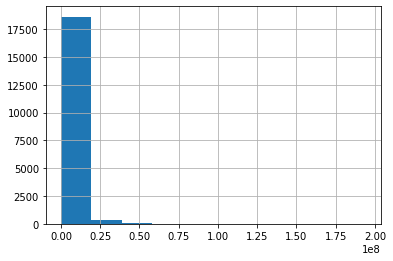

In [33]:
male_df.value_eur.hist()

<AxesSubplot:xlabel='value_eur', ylabel='Count'>

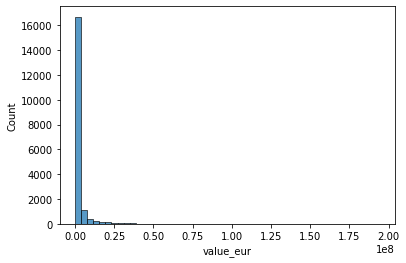

In [34]:
sns.histplot(data=male_df,x='value_eur',bins=50)

In [35]:
male_df['log_value_eur'] = np.log(male_df['value_eur'])

<AxesSubplot:xlabel='log_value_eur', ylabel='Count'>

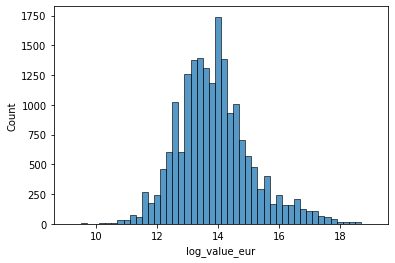

In [36]:
sns.histplot(data=male_df,x='log_value_eur',bins=50)

In [37]:
from scipy.stats import kstest

z,p = kstest(male_df.value_eur, 'norm', alternative='less')
print(p < 0.05)

True


In [38]:
male_df.value_eur.quantile([.25, .5, .75])

0.25     475000.0
0.50     975000.0
0.75    2000000.0
Name: value_eur, dtype: float64

In [39]:
count = 0
listofeur = []
for i,j in male_df.value_eur.iteritems():
    listofeur.append(j)
    count += 1
    if count == 10:
        break
     

In [40]:
listofeur[0] + 1

78000001.0

In [41]:
male_df.value_eur.nlargest(10)

sofifa_id
231747    194000000.0
239085    137500000.0
202126    129500000.0
190871    129000000.0
192985    125500000.0
188545    119500000.0
230621    119500000.0
228702    119500000.0
233049    116500000.0
231281    114000000.0
Name: value_eur, dtype: float64

<AxesSubplot:>

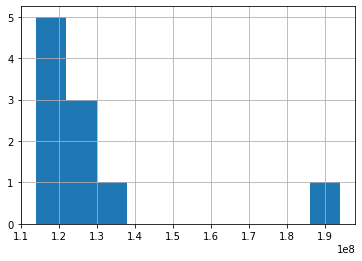

In [42]:
male_df.value_eur.nlargest(10).hist()

In [43]:
male_df.value_eur.nsmallest(10)

sofifa_id
245558     9000.0
102881    15000.0
166713    15000.0
183031    15000.0
138431    15000.0
149697    15000.0
157190    15000.0
140300    20000.0
186838    20000.0
232473    20000.0
Name: value_eur, dtype: float64

<AxesSubplot:>

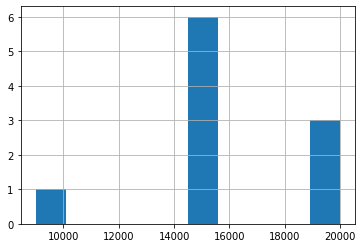

In [44]:
male_df.value_eur.nsmallest(10).hist()

In [45]:
# comment on column 6
# similiar to value_eur: has an adequate format (float64) but seems to be highly skewed
# should be procesed later on the preprocessing step?

In [46]:
male_df.wage_eur.dtype

dtype('float64')

In [47]:
len(male_df.wage_eur.unique())

133

In [48]:
male_df.wage_eur.isna().sum()

0

<AxesSubplot:>

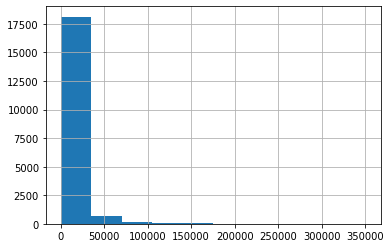

In [49]:
male_df.wage_eur.hist()

<AxesSubplot:xlabel='wage_eur', ylabel='Count'>

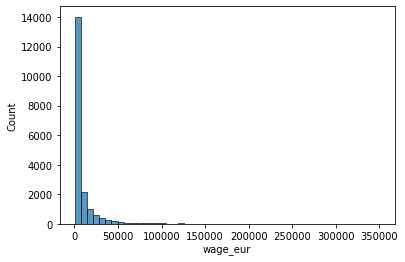

In [50]:
sns.histplot(data=male_df,x='wage_eur',bins=50)

In [51]:
male_df['log_wage_eur'] = np.log(male_df.wage_eur)

<AxesSubplot:xlabel='log_wage_eur', ylabel='Count'>

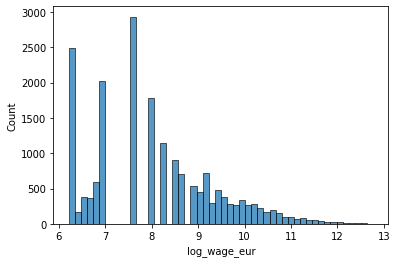

In [52]:
sns.histplot(data=male_df,x='log_wage_eur',bins=50)

In [53]:
z,p = kstest(male_df.wage_eur, 'norm', alternative='two-sided')
print(p < 0.05)

True


In [54]:
z, p

(1.0, 0.0)

In [55]:
# comments on column 7
# adequate format, some outliers detected may be a good idea to drop them if we are gonna
# use column age for some regression

In [56]:
male_df.age.dtype

dtype('int64')

In [57]:
len(male_df.age.unique())

28

<AxesSubplot:xlabel='age'>

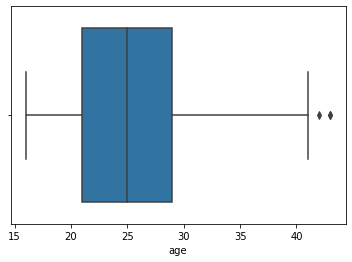

In [58]:
sns.boxplot(x = male_df.age)


In [59]:
# modified column 8
# modification: changed the type to datetime

In [60]:
male_df.dob.dtypes

dtype('O')

In [61]:
male_df.dob.head()

sofifa_id
158023    1987-06-24
188545    1988-08-21
20801     1985-02-05
190871    1992-02-05
192985    1991-06-28
Name: dob, dtype: object

In [62]:
male_df.dob =  pd.to_datetime(male_df.dob.apply(lambda x: str(x)))

In [63]:
male_df.dob.dtypes

dtype('<M8[ns]')

In [64]:
# column 9
# height cm has the adequate format but and looks like a normal distribution but
# does not compute the kstest properly...?

In [65]:
len(male_df.height_cm.unique())

49

<AxesSubplot:>

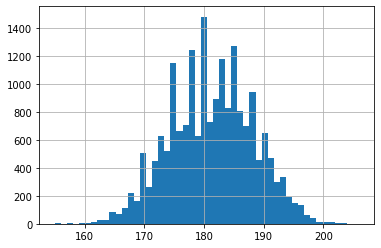

In [66]:
male_df.height_cm.hist(bins=50)

In [67]:
from scipy.stats import norm

In [68]:
male_df.height_cm

sofifa_id
158023    170
188545    185
20801     187
190871    175
192985    181
         ... 
261962    180
262040    175
262760    178
262820    173
264540    167
Name: height_cm, Length: 19165, dtype: int64

In [69]:
loc, scale = norm.fit(male_df.height_cm)
# create a normal distribution with loc and scale
n = norm(loc=loc, scale=scale)

In [70]:
z,p = kstest(male_df.height_cm, n.cdf, alternative='two-sided')
print(p < 0.05)

True


In [71]:
z,p = kstest(male_df.height_cm, 'norm', alternative='two-sided')
print(p < 0.05)

True


In [72]:
from scipy.stats import shapiro

In [73]:
z,p = shapiro(male_df.height_cm.values)

/usr/local/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [74]:
print(z,p)

0.9959070682525635 1.5190657738443894e-22


In [75]:
male_df.height_cm.isna().sum()

0

In [76]:
# column 10
# similar to height cm: has the adequate format but and looks like a normal distribution but
# does not compute the kstest properly...?

In [77]:
len(male_df.weight_kg.unique())

58

In [78]:
male_df.weight_kg.dtype

dtype('int64')

<AxesSubplot:>

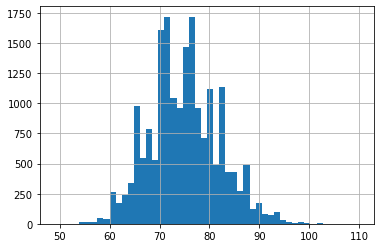

In [79]:
male_df.weight_kg.hist(bins=50)

In [80]:
z,p = kstest(male_df.weight_kg, cdf='norm' ,alternative='two-sided')
print(p < 0.05)

True


In [81]:
z, p

(1.0, 0.0)

In [82]:
male_df.iloc[:,:25].columns

Index(['short_name', 'player_positions', 'overall', 'potential', 'value_eur',
       'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id',
       'club_name', 'league_name', 'league_level', 'club_position',
       'club_jersey_number', 'club_loaned_from', 'club_joined',
       'club_contract_valid_until', 'nationality_id', 'nationality_name',
       'nation_team_id', 'nation_position', 'nation_jersey_number',
       'preferred_foot'],
      dtype='object')

In [83]:
# column 11 drop club_team_id
# Keep it as it is
# we can regress if a club is going to change division

In [84]:
# male_df.drop('club_team_id',axis=1,inplace=True)

In [85]:
# column 12 club name
# keep it as it is: can be used in groupbys

In [86]:
len(male_df.club_name.unique())

701

In [87]:
male_df.club_name.isna().sum()

0

In [88]:
# column 13 league name
# keep it as it is

In [89]:
male_df.league_name

sofifa_id
158023                    French Ligue 1
188545              German 1. Bundesliga
20801             English Premier League
190871                    French Ligue 1
192985            English Premier League
                       ...              
261962              Chinese Super League
262040    Rep. Ireland Airtricity League
262760    Rep. Ireland Airtricity League
262820    Rep. Ireland Airtricity League
264540               Indian Super League
Name: league_name, Length: 19165, dtype: object

In [90]:
len(male_df.league_name.unique())

55

In [91]:
# male_df.drop('league_name',axis=1,inplace=True)

In [92]:
# column 14 league level
# keep it as it is

In [93]:
len(male_df.league_level.unique())

5

In [94]:
male_df.league_level.unique()

array([1., 2., 3., 4., 5.])

In [95]:
male_df.league_level.dtypes

dtype('float64')

In [96]:
# from sklearn.preprocessing import OrdinalEncoder

In [97]:
# enc = OrdinalEncoder(categories=[[1.,2.,3.,4.,5.]])

In [98]:
# enc.fit_transform(male_df.league_level.values.reshape(-1,1))

In [99]:
# male_df.league_level = enc.fit_transform(male_df.league_level.values.reshape(-1,1))

In [100]:
# male_df.league_level

In [101]:
# column 15
# this column can overwrite column "player_positions"
# 100% coincide between this column and the first position of player_positions
# we aggregate positions so only 9 remain to make it more machine-learning like

In [102]:

len(male_df.club_position.unique())

29

In [103]:
male_df.club_position.unique()

array(['RW', 'ST', 'LW', 'RCM', 'GK', 'CF', 'CDM', 'LCB', 'RDM', 'RS',
       'LCM', 'SUB', 'CAM', 'RCB', 'LDM', 'LB', 'RB', 'LM', 'RM', 'LS',
       'CB', 'RES', 'RWB', 'RF', 'CM', 'LWB', 'LAM', 'LF', 'RAM'],
      dtype=object)

In [104]:
def position_agg(pos):
    if pos in ['CF','LF','RF','ST','LS','RS']:
        return 'F'
    elif pos in ['LM','RM','CAM','CM','RCM','LCM','LAM','RAM','CDM','LDM','RDM','LW','RW']:
        return 'M'
    elif pos in ['LB','LWB','CB','RWB','RB','LCB','RCB']:
        return 'D'
    else:
        return pos  

In [105]:
male_df.club_position = male_df.club_position.apply(lambda x: position_agg(x))

In [106]:
male_df.club_position.unique()

array(['M', 'F', 'GK', 'D', 'SUB', 'RES'], dtype=object)

In [107]:
male_df.club_position.value_counts()

SUB    8294
RES    3165
M      3160
D      2848
F       997
GK      701
Name: club_position, dtype: int64

In [108]:
# column 16
# drop it , 100% unnecesary

In [109]:
male_df.club_jersey_number

sofifa_id
158023    30.0
188545     9.0
20801      7.0
190871    10.0
192985    17.0
          ... 
261962    36.0
262040    27.0
262760    31.0
262820    12.0
264540    13.0
Name: club_jersey_number, Length: 19165, dtype: float64

In [110]:
male_df.drop('club_jersey_number',axis=1,inplace=True)

In [111]:
# column 17
# column can be dicotomized (loaned or not loaned)

In [112]:
male_df.club_loaned_from

sofifa_id
158023    NaN
188545    NaN
20801     NaN
190871    NaN
192985    NaN
         ... 
261962    NaN
262040    NaN
262760    NaN
262820    NaN
264540    NaN
Name: club_loaned_from, Length: 19165, dtype: object

In [113]:
male_df.club_loaned_from.isna().sum()

18063

In [114]:
male_df.club_loaned_from.isna().sum() / len(male_df.club_loaned_from) 

0.9424993477693713

In [115]:
male_df.club_loaned_from.apply(lambda x: 0 if isinstance(x,float) else 1)

sofifa_id
158023    0
188545    0
20801     0
190871    0
192985    0
         ..
261962    0
262040    0
262760    0
262820    0
264540    0
Name: club_loaned_from, Length: 19165, dtype: int64

In [116]:
male_df.club_loaned_from = male_df.club_loaned_from.apply(lambda x: 0 if isinstance(x,float) else 1)

In [117]:
# column 18
# changed to datetime but unsure if we will use it

In [118]:
male_df.club_joined.dtypes

dtype('O')

In [119]:
male_df.club_joined = pd.to_datetime(male_df.club_joined.apply(lambda x: str(x)))

In [120]:
male_df.club_joined.dtypes

dtype('<M8[ns]')

In [121]:
# column 19
# i don't think we will use this column, in my opinion we should drop it

In [122]:
male_df.club_contract_valid_until

sofifa_id
158023    2023.0
188545    2023.0
20801     2023.0
190871    2025.0
192985    2025.0
           ...  
261962    2021.0
262040    2021.0
262760    2021.0
262820    2021.0
264540    2025.0
Name: club_contract_valid_until, Length: 19165, dtype: float64

In [123]:
male_df.drop('club_contract_valid_until',axis=1,inplace=True)

In [124]:
# column 20 and 21
# we will drop it and keep nationality_name (column 21)

In [125]:
male_df.drop('nationality_id',axis=1,inplace=True)

In [126]:
# column 22
# nationality_team_id we will keep it in case we want to gather with groupby
# there are many NaN in this column, but it makes sense since not all players play with national teams

In [127]:
len(male_df.nation_team_id.unique())

34

In [128]:
male_df.nation_team_id.isna().sum()

18467

In [129]:
# column 23
# 'nation_position' is similar to other columns player and national_position, maybe we can
# drop it..
# we use again the position_aggregate function

In [130]:
nation_club_position = male_df.nation_position == male_df.club_position

In [131]:
male_df[nation_club_position]

short_name player_positions  overall  potential    value_eur  \
sofifa_id                                                                    
167495          M. Neuer               GK       90         90   13500000.0   
192119       T. Courtois               GK       89         91   85500000.0   
230621     G. Donnarumma               GK       89         93  119500000.0   
167948         H. Lloris               GK       87         87   13500000.0   
186153       W. Szczęsny               GK       87         87   42000000.0   
...                  ...              ...      ...        ...          ...   
238273       J. Marković               ST       64         75    1300000.0   
231954            Xu Xin              CDM       63         65     525000.0   
231131        J. McGarry               LB       62         69     750000.0   
248165          A. Rațiu               RM       62         71     875000.0   
219392          A. Rufer               CM       61         64     425000.0   

           wage_eur  age        dob  height_cm  weight_kg  ...   rdm   rwb  \
sofifa_id                                                  ...               
167495      86000.0   35 1986-03-27        193         93  ...  43+3  37+3   
192119     250000.0   29 1992-05-11        199         96  ...  31+3  29+3   
230621     110000.0   22 1999-02-25        196         90  ...  34+3  31+3   
167948     125000.0   34 1986-12-26        188         82  ...  38+3  35+3   
186153     105000.0   31 1990-04-18        195         90  ...  31+3  28+3   
...             ...  ...        ...        ...        ...  ...   ...   ...   
238273       3000.0   20 2001-03-23        183         75  ...  49+2  49+2   
231954       4000.0   27 1994-04-19        179         70  ...  62+2  60+2   
231131        800.0   23 1998-04-09        180         75  ...  57+2  61+2   
248165       2000.0   23 1998-06-20        183         72  ...  59+2  61+2   
219392        900.0   25 1996-06-12        184         75  ...  60+2  59+2   

             lb   lcb    cb   rcb    rb    gk  log_value_eur log_wage_eur  
sofifa_id                                                                  
167495     35+3  34+3  34+3  34+3  35+3  88+2      16.418200    11.362103  
192119     29+3  29+3  29+3  29+3  29+3  86+3      18.264027    12.429216  
230621     31+3  31+3  31+3  31+3  31+3  87+3      18.598827    11.608236  
167948     34+3  30+3  30+3  30+3  34+3  85+2      16.418200    11.736069  
186153     28+3  29+3  29+3  29+3  28+3  85+2      17.553180    11.561716  
...         ...   ...   ...   ...   ...   ...            ...          ...  
238273     48+2  48+2  48+2  48+2  48+2  15+2      14.077875     8.006368  
231954     60+2  62+2  62+2  62+2  60+2  16+2      13.171154     8.294050  
231131     60+2  56+2  56+2  56+2  60+2  14+2      13.527828     6.684612  
248165     60+2  59+2  59+2  59+2  60+2  16+2      13.681979     7.600902  
219392     58+2  58+2  58+2  58+2  58+2  17+2      12.959844     6.802395  

[131 rows x 101 columns]

In [132]:
male_df.nation_position = male_df.nation_position.apply(lambda x: position_agg(x))

In [133]:
male_df.nation_position.value_counts()

SUB    361
M      144
D      122
F       41
GK      30
Name: nation_position, dtype: int64

In [134]:
male_df.nation_position.isna().sum()

18467

In [135]:
# column 24 
# we drop it since it's not useful

In [136]:
male_df.nation_jersey_number

sofifa_id
158023    10.0
188545     9.0
20801      7.0
190871     NaN
192985     7.0
          ... 
261962     NaN
262040     NaN
262760     NaN
262820     NaN
264540     NaN
Name: nation_jersey_number, Length: 19165, dtype: float64

In [137]:
male_df.drop('nation_jersey_number',axis=1,inplace=True)

In [138]:
# column 25
# we change to 0 and 1 in case if we want to use it on ML

In [139]:
male_df.preferred_foot

sofifa_id
158023     Left
188545    Right
20801     Right
190871    Right
192985    Right
          ...  
261962    Right
262040    Right
262760    Right
262820    Right
264540    Right
Name: preferred_foot, Length: 19165, dtype: object

In [140]:
male_df.preferred_foot.value_counts()

Right    14616
Left      4549
Name: preferred_foot, dtype: int64

In [141]:
male_df.preferred_foot.isna().sum()

0

In [142]:
male_df.preferred_foot = male_df.preferred_foot.apply(lambda x: 0 if x == 'Left' else 1)

In [143]:
male_df.head()

short_name player_positions  overall  potential  \
sofifa_id                                                           
158023              L. Messi               RW       93         93   
188545        R. Lewandowski               ST       92         92   
20801      Cristiano Ronaldo               ST       91         91   
190871             Neymar Jr               LW       91         91   
192985          K. De Bruyne               CM       91         91   

             value_eur  wage_eur  age        dob  height_cm  weight_kg  ...  \
sofifa_id                                                               ...   
158023      78000000.0  320000.0   34 1987-06-24        170         72  ...   
188545     119500000.0  270000.0   32 1988-08-21        185         81  ...   
20801       45000000.0  270000.0   36 1985-02-05        187         83  ...   
190871     129000000.0  270000.0   29 1992-02-05        175         68  ...   
192985     125500000.0  350000.0   30 1991-06-28        181         70  ...   

            rdm   rwb    lb   lcb    cb   rcb    rb    gk  log_value_eur  \
sofifa_id                                                                  
158023     64+3  66+3  61+3  50+3  50+3  50+3  61+3  19+3      18.172219   
188545     66+3  64+3  61+3  60+3  60+3  60+3  61+3  19+3      18.598827   
20801      59+3  63+3  60+3  53+3  53+3  53+3  60+3  20+3      17.622173   
190871     63+3  67+3  62+3  50+3  50+3  50+3  62+3  20+3      18.675323   
192985     80+3  79+3  75+3  69+3  69+3  69+3  75+3  21+3      18.647816   

          log_wage_eur  
sofifa_id               
158023       12.676076  
188545       12.506177  
20801        12.506177  
190871       12.506177  
192985       12.765688  

[5 rows x 100 columns]

Columns 78:105

In [163]:
male_df_78 = male_df.iloc[:,71:98]
male_df_78.head()

ls    st    rs  lw  lf  cf  rf  rw   lam   cam  ...   ldm   cdm  \
sofifa_id                                                    ...               
158023     89+3  89+3  89+3  92  93  93  93  92    93    93  ...  64+3  64+3   
188545     90+2  90+2  90+2  85  88  88  88  85  86+3  86+3  ...  66+3  66+3   
20801      90+1  90+1  90+1  88  89  89  89  88  86+3  86+3  ...  59+3  59+3   
190871     83+3  83+3  83+3  90  88  88  88  90  89+2  89+2  ...  63+3  63+3   
192985     83+3  83+3  83+3  88  87  87  87  88  89+2  89+2  ...  80+3  80+3   

            rdm   rwb    lb   lcb    cb   rcb    rb    gk  
sofifa_id                                                  
158023     64+3  66+3  61+3  50+3  50+3  50+3  61+3  19+3  
188545     66+3  64+3  61+3  60+3  60+3  60+3  61+3  19+3  
20801      59+3  63+3  60+3  53+3  53+3  53+3  60+3  20+3  
190871     63+3  67+3  62+3  50+3  50+3  50+3  62+3  20+3  
192985     80+3  79+3  75+3  69+3  69+3  69+3  75+3  21+3  

[5 rows x 27 columns]

In [164]:
for x in male_df_78.columns:
    for i in male_df_78[x]:
        if len(str(i))==3:
            male_df_78[x]=int(str(i)[:1])
        else:
            male_df_78[x]=int(str(i)[:2])

In [165]:
for x in male_df_78.columns:
    male_df[x]=male_df_78[x]

In [166]:
male_df

short_name player_positions  overall  potential  \
sofifa_id                                                            
158023               L. Messi               RW       93         93   
188545         R. Lewandowski               ST       92         92   
20801       Cristiano Ronaldo               ST       91         91   
190871              Neymar Jr               LW       91         91   
192985           K. De Bruyne               CM       91         91   
...                       ...              ...      ...        ...   
261962              Song Defu              CDM       47         52   
262040              C. Porter               CM       47         59   
262760               N. Logue               CM       47         55   
262820              L. Rudden               ST       47         60   
264540     E. Lalchhanchhuaha              CAM       47         60   

             value_eur  wage_eur  age        dob  height_cm  weight_kg  ...  \
sofifa_id                                                               ...   
158023      78000000.0  320000.0   34 1987-06-24        170         72  ...   
188545     119500000.0  270000.0   32 1988-08-21        185         81  ...   
20801       45000000.0  270000.0   36 1985-02-05        187         83  ...   
190871     129000000.0  270000.0   29 1992-02-05        175         68  ...   
192985     125500000.0  350000.0   30 1991-06-28        181         70  ...   
...                ...       ...  ...        ...        ...        ...  ...   
261962         70000.0    1000.0   22 1999-01-02        180         64  ...   
262040        110000.0     500.0   19 2002-03-18        175         70  ...   
262760        100000.0     500.0   21 2000-02-07        178         72  ...   
262820        110000.0     500.0   19 2002-04-23        173         66  ...   
264540        110000.0     500.0   19 2002-02-06        167         61  ...   

           rdm rwb  lb  lcb  cb  rcb  rb  gk  log_value_eur log_wage_eur  
sofifa_id                                                                 
158023      44  45  45   41  41   41  45  16      18.172219    12.676076  
188545      44  45  45   41  41   41  45  16      18.598827    12.506177  
20801       44  45  45   41  41   41  45  16      17.622173    12.506177  
190871      44  45  45   41  41   41  45  16      18.675323    12.506177  
192985      44  45  45   41  41   41  45  16      18.647816    12.765688  
...        ...  ..  ..  ...  ..  ...  ..  ..            ...          ...  
261962      44  45  45   41  41   41  45  16      11.156251     6.907755  
262040      44  45  45   41  41   41  45  16      11.608236     6.214608  
262760      44  45  45   41  41   41  45  16      11.512925     6.214608  
262820      44  45  45   41  41   41  45  16      11.608236     6.214608  
264540      44  45  45   41  41   41  45  16      11.608236     6.214608  

[19165 rows x 100 columns]